In [1]:
#import the data file using pandas 
import pandas as pd
df=pd.read_csv('C:\\Users\\jhicadmin\\Pictures\\data files\\ToyotaCorolla - MLR.csv')

In [2]:
# it will show the first five rows 
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [3]:
# we are converting the categorical columns into numerical columns 
from sklearn.preprocessing import LabelEncoder
Le=LabelEncoder()
df['Fuel_Type']=Le.fit_transform(df['Fuel_Type'])

In [4]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,1,90,0,2000,3,4,5,1165
1,13750,23,72937,1,90,0,2000,3,4,5,1165
2,13950,24,41711,1,90,0,2000,3,4,5,1165
3,14950,26,48000,1,90,0,2000,3,4,5,1165
4,13750,30,38500,1,90,0,2000,3,4,5,1170


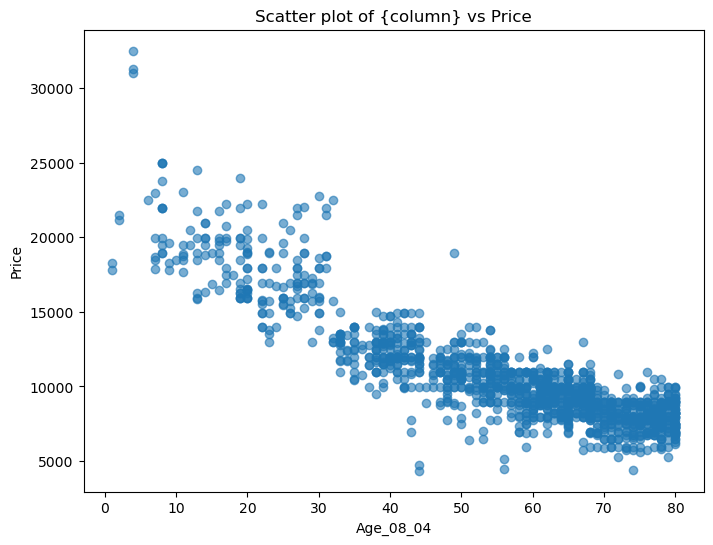

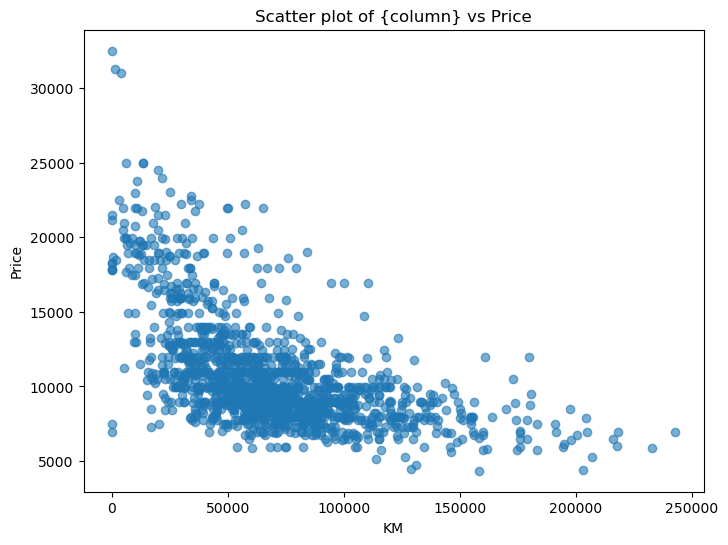

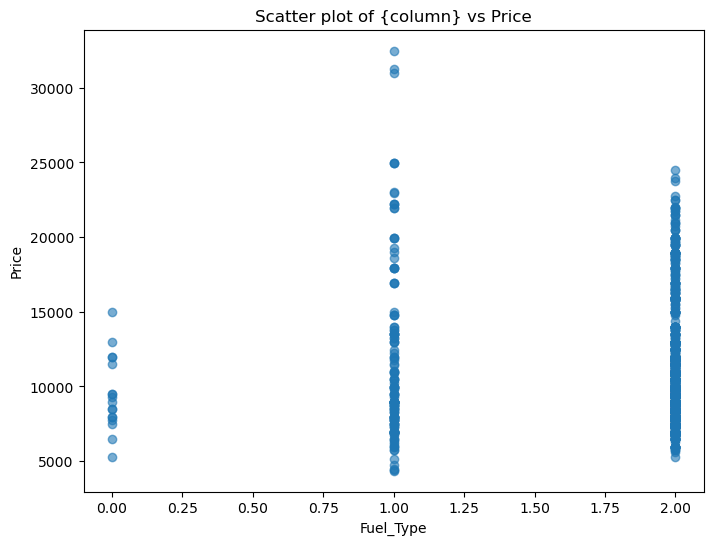

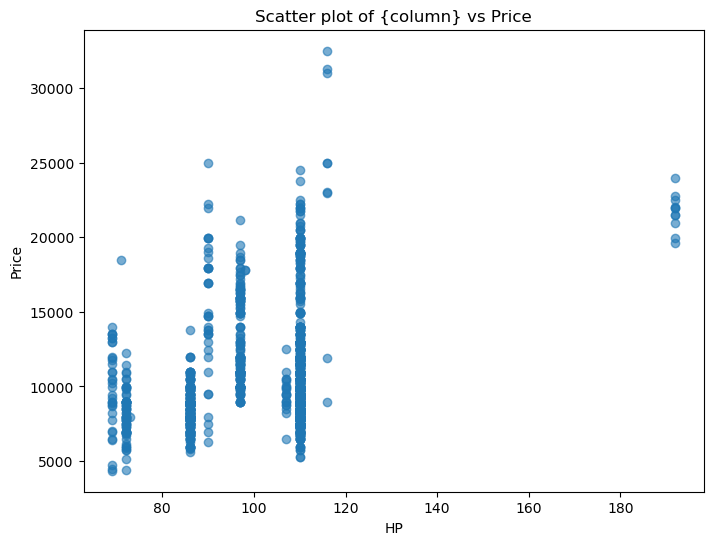

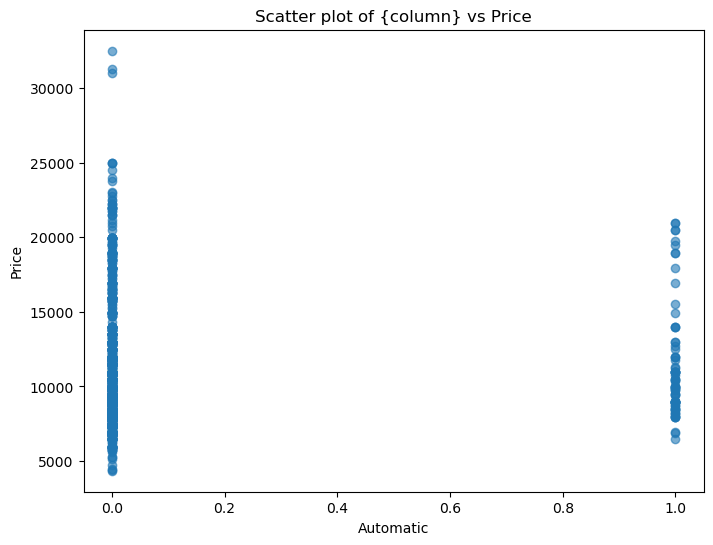

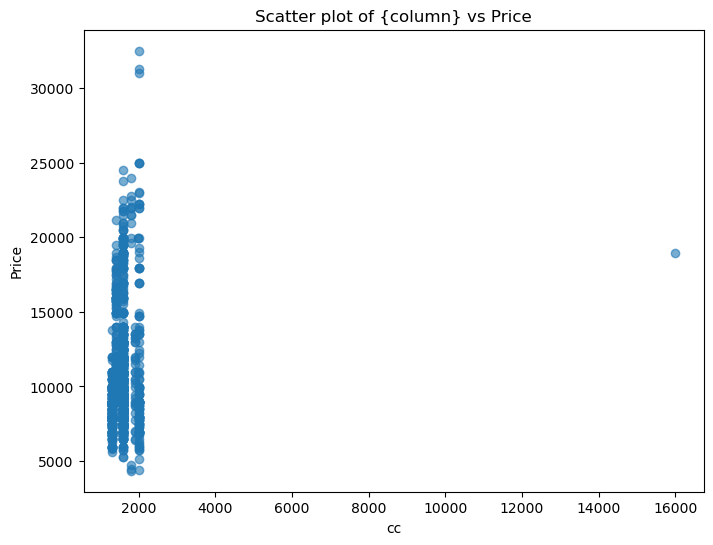

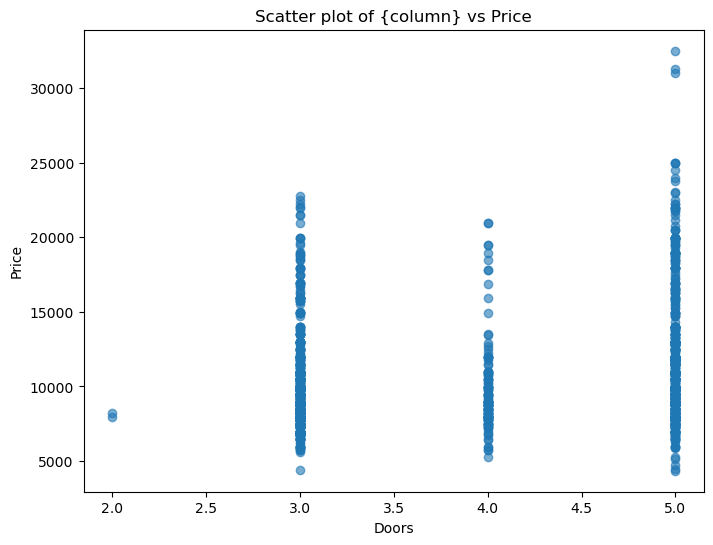

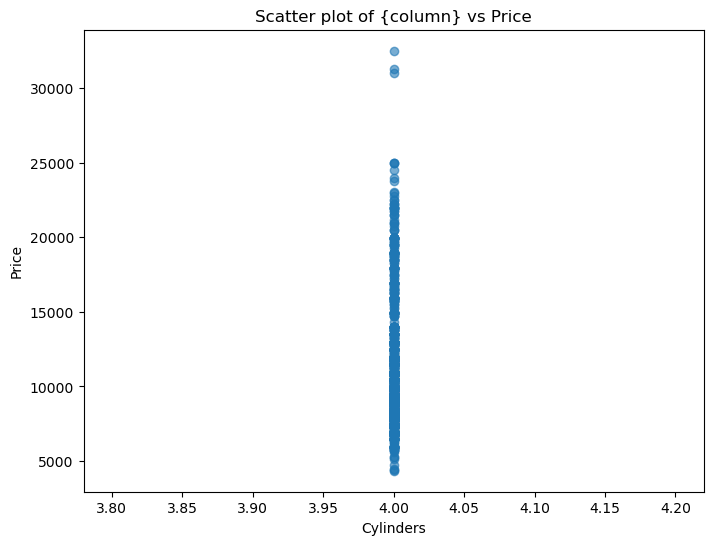

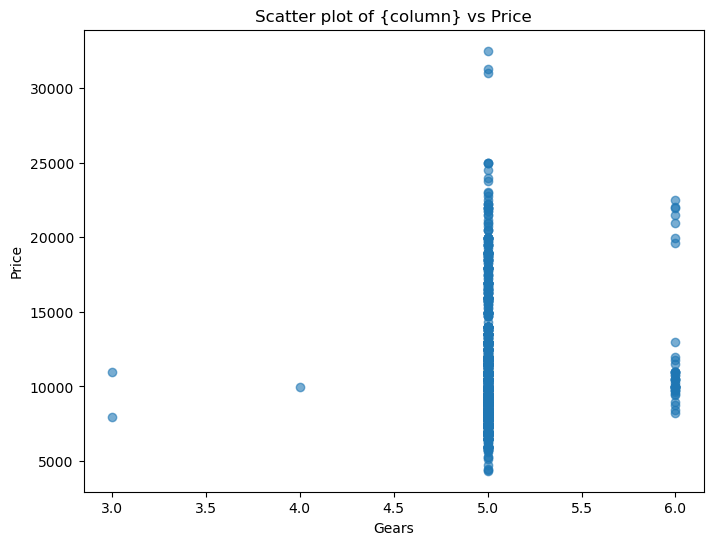

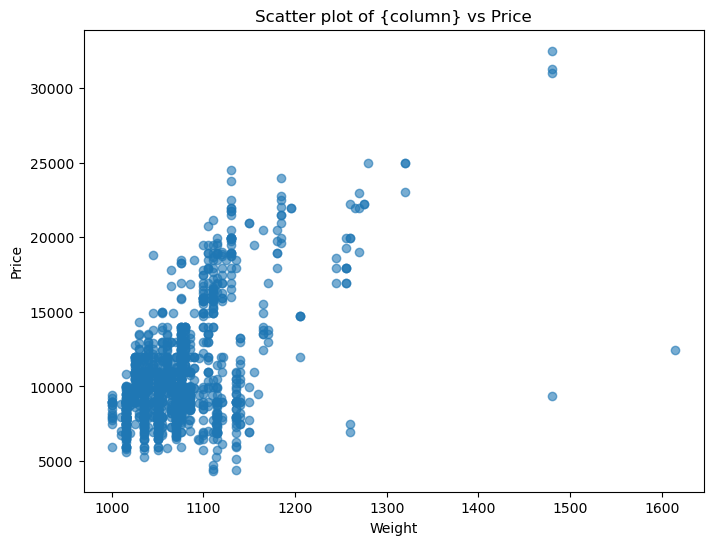

In [5]:
# scatterplot 
import matplotlib.pyplot as plt
y = df['Price']

# Plotting individual scatter plots
for column in df.columns:
    if column != 'Price':  # Skip the 'Price' column
        plt.figure(figsize=(8, 6))
        plt.scatter(df[column], y, alpha=0.6)
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.title('Scatter plot of {column} vs Price')
        plt.show()

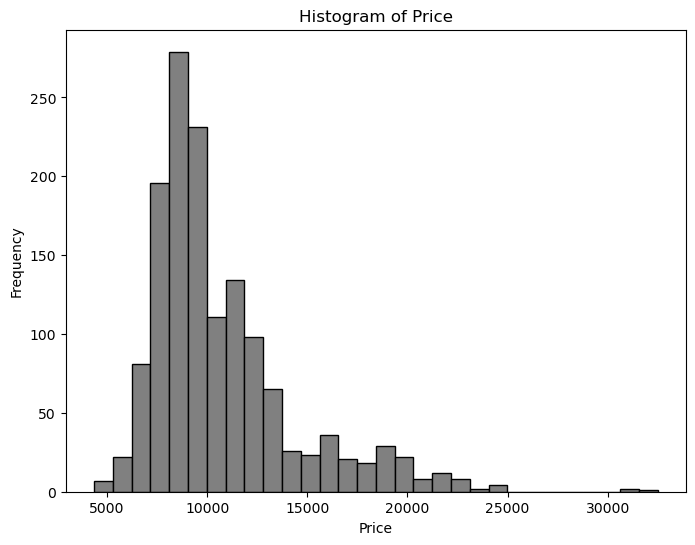

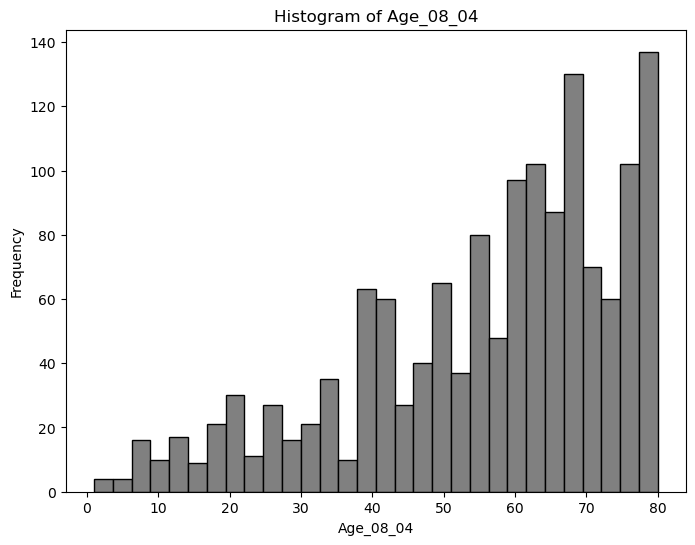

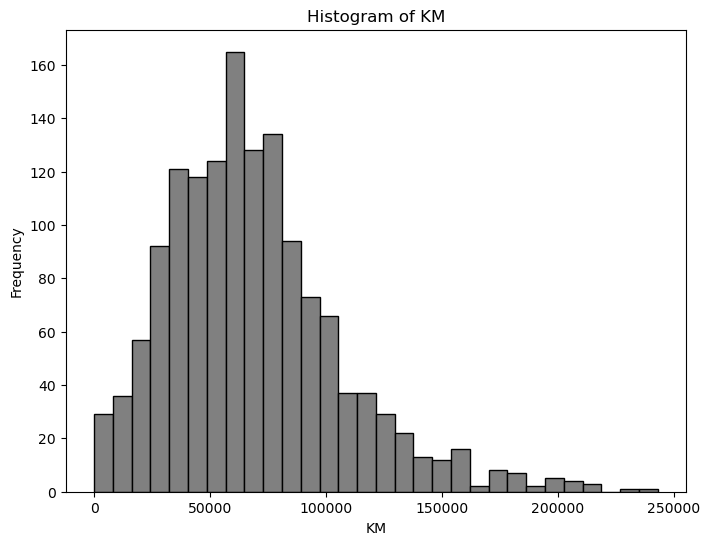

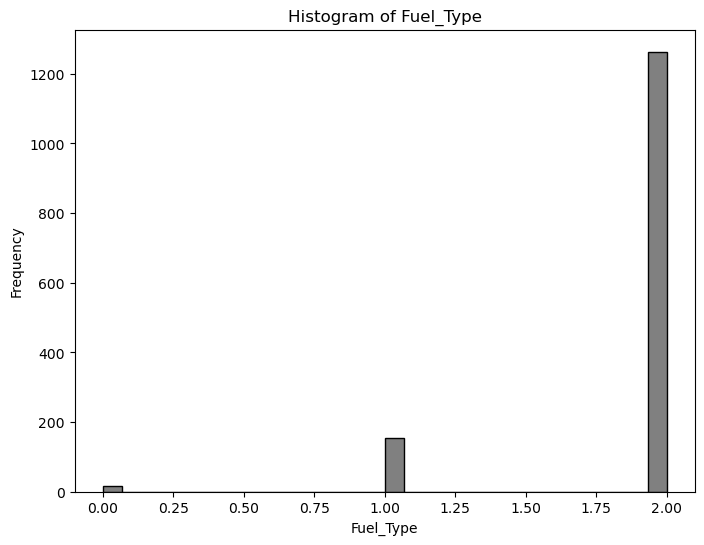

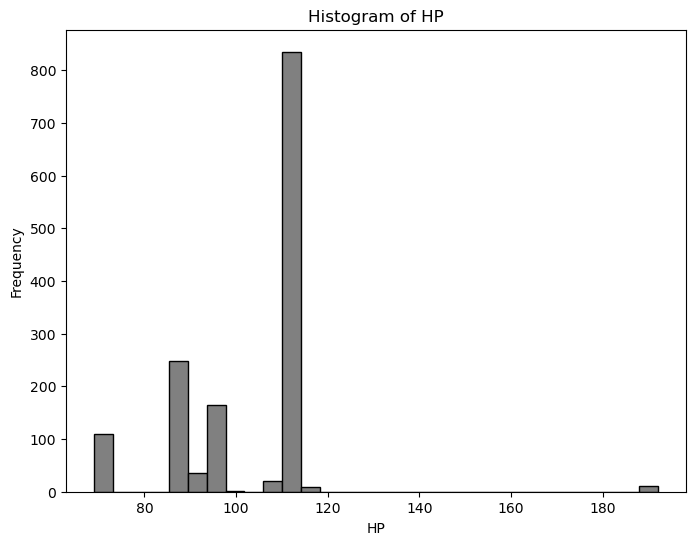

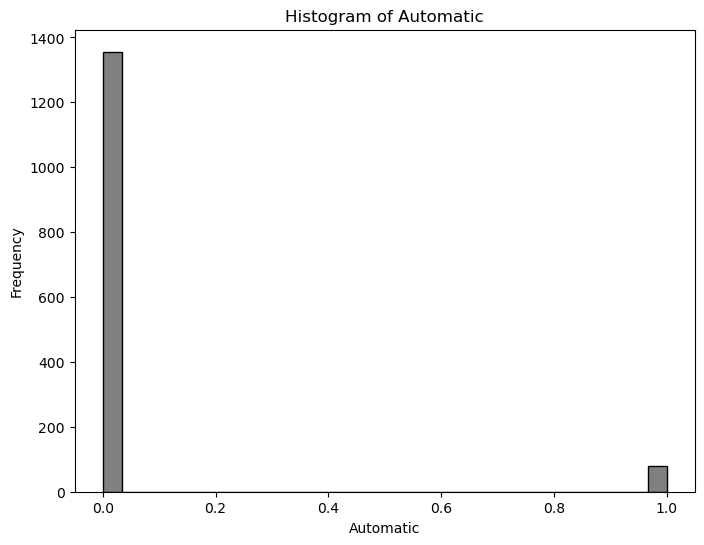

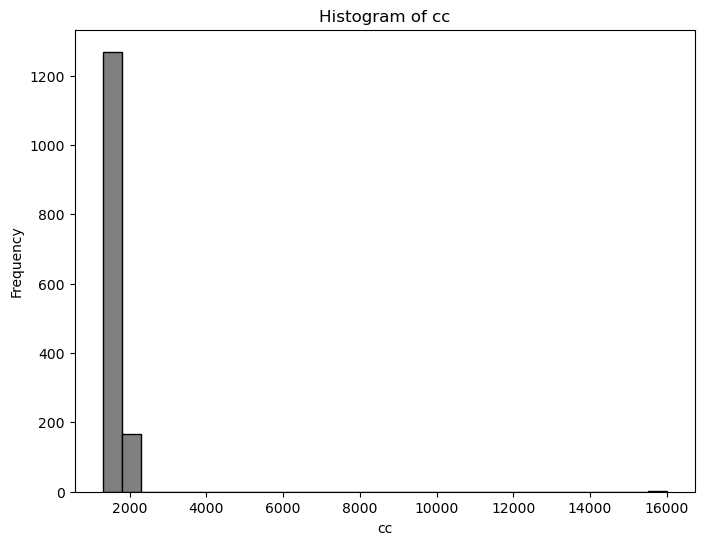

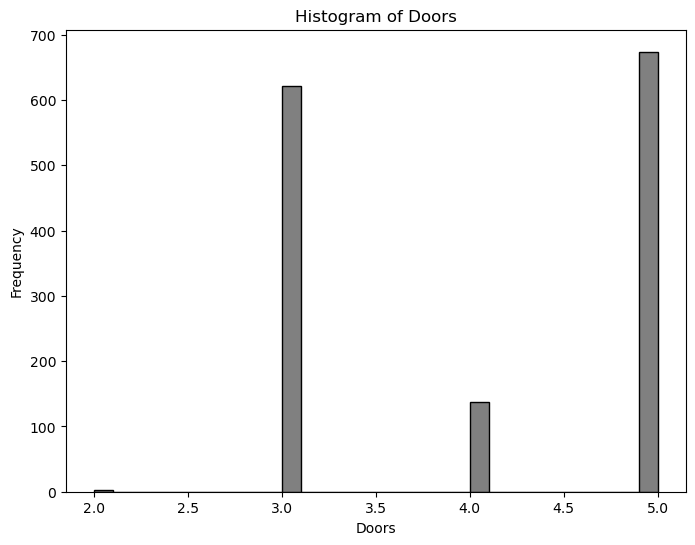

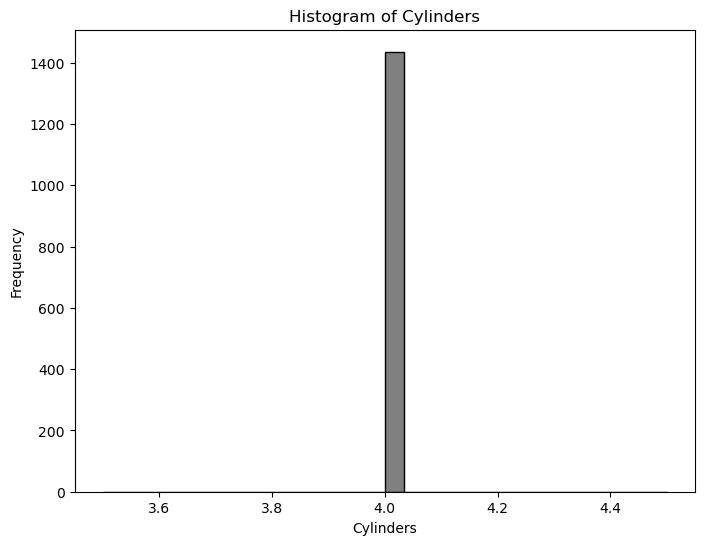

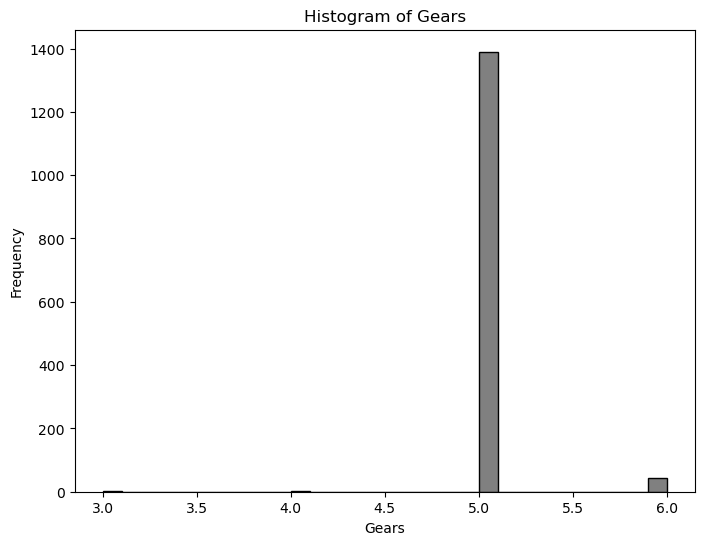

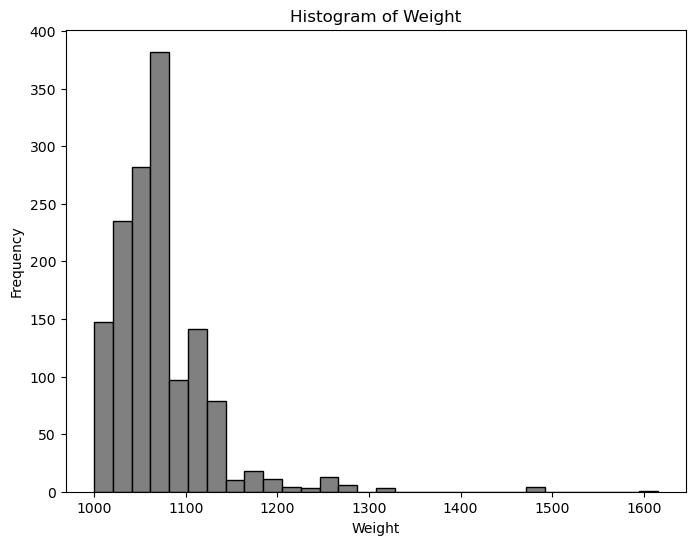

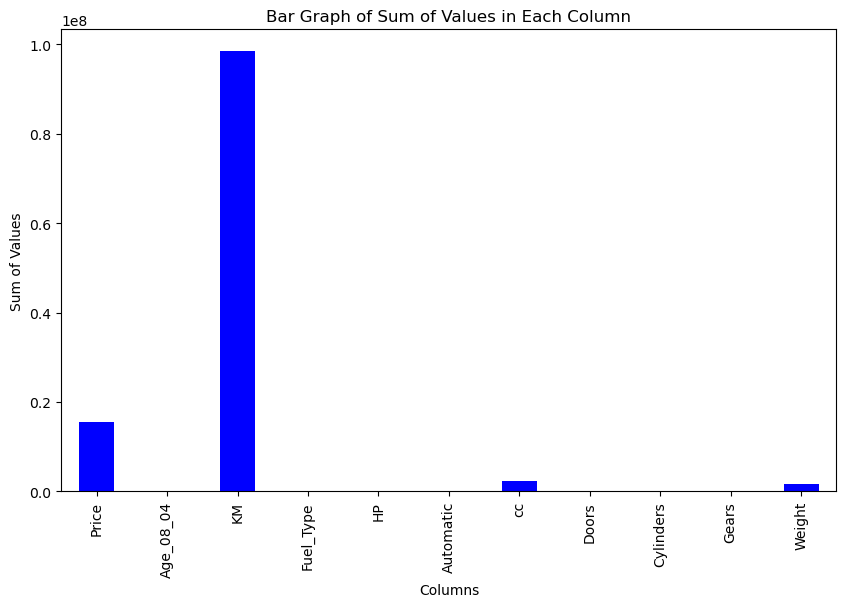

In [6]:
import matplotlib.pyplot as plt


# Generate histograms for each variable in the dataset
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=30, color='grey', edgecolor='black')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

column_sums = df.sum()

# Plotting a single bar graph with all columns
plt.figure(figsize=(10, 6))
column_sums.plot(kind='bar', color='blue')
plt.xlabel('Columns')
plt.ylabel('Sum of Values')
plt.title('Bar Graph of Sum of Values in Each Column')
plt.show()


In [7]:
df.corr()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,-0.022157,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,0.080261,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.420586,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
Fuel_Type,-0.022157,0.080261,-0.420586,1.000000,0.409476,0.069718,-0.277239,-0.026935,NaN,0.069655,-0.505303
HP,0.314990,-0.156622,-0.333538,0.409476,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.069718,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,-0.277239,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,-0.026935,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.069655,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613


In [10]:
from sklearn.preprocessing import StandardScaler
# Standardization of the dataset
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_features, columns=df.columns)


In [11]:
from sklearn.model_selection import train_test_split

# Split the data into features and target variable
X = df_scaled.drop('Price', axis=1)
y = df_scaled['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(1148, 10) (288, 10) (1148,) (288,)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Assuming 'Price' is the target variable, separate features and target
X = df.drop('Price', axis=1)
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Simple MLR
model_1 = LinearRegression()
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)

# Model 2: MLR with interaction terms between the first two columns
first_column, second_column = X_train.columns[:2]  # Take the first two columns
X_train_2 = X_train.copy()
X_train_2['interaction_term'] = X_train[first_column] * X_train[second_column]
X_test_2 = X_test.copy()
X_test_2['interaction_term'] = X_test[first_column] * X_test[second_column]

model_2 = LinearRegression()
model_2.fit(X_train_2, y_train)
y_pred_2 = model_2.predict(X_test_2)

# Model 3: MLR with polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_3 = LinearRegression()
model_3.fit(X_train_poly, y_train)
y_pred_3 = model_3.predict(X_test_poly)

# Evaluate the models
for i, (y_pred, model) in enumerate([(y_pred_1, model_1), (y_pred_2, model_2), (y_pred_3, model_3)], 1):
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f'Model {i}: RMSE = {rmse}, R^2 = {r2}')

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Lasso Regression: RMSE = {rmse_lasso}, R^2 = {r2_lasso}')

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression: RMSE = {rmse_ridge}, R^2 = {r2_ridge}')

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


Model 1: RMSE = 1448.0508071258068, R^2 = 0.8428476112018004
Model 2: RMSE = 1337.0647813635994, R^2 = 0.866014350485149
Model 3: RMSE = 1731.566321736375, R^2 = 0.775285214980604
Lasso Regression: RMSE = 1448.0062783725084, R^2 = 0.8428572761836126
Ridge Regression: RMSE = 1447.9967963866563, R^2 = 0.842859334213647
     feature          VIF
0  Age_08_04     1.918394
1         KM     1.946100
2  Fuel_Type     2.379914
3         HP     1.488481
4  Automatic     1.062652
5         cc     1.168921
6      Doors     1.186610
7  Cylinders  1756.548275
8      Gears     1.113522
9     Weight     2.327003


In [1]:
#1.    What is Normalization & Standardization and how is it helpful?
# ans: Normalization is the process used to convert the data into Symmetric form most of companies use the normal distribution function to see the results without having outliers. 
#      Standarization will take the data from another location, move it to around zero, and make it fall between -3 and +3. 
#2.   What techniques can be used to address multicollinearity in multiple linear regression?
# ans: If two variables are too similar to each other, drop one of them or merge them and it will be shrinking or eliminate some coefficients by using 'Lasso' and 'Ridge' methods